In [42]:
import pandas as pd
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your CSV file
df = pd.read_csv("D:\\intership tasks\\twitter_training.csv", header=None)  # Assuming no header is present
df.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']

# Display the first few rows to inspect the data
print(df.head())
# Assign column names based on their position


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vaidehi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   tweet_id       entity sentiment   
0      2401  Borderlands  Positive  \
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       tweet_content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [43]:
# Example of data cleaning (adjust as per your needs)
df.drop_duplicates(inplace=True)
df.dropna(subset=['tweet_content'], inplace=True)


In [44]:
# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and store results in a new column 'sentiment'
df['sentiment_score'] = df['tweet_content'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display the updated DataFrame (optional)
print(df.head())


   tweet_id       entity sentiment   
0      2401  Borderlands  Negative  \
1      2401  Borderlands  Negative   
2      2401  Borderlands  Negative   
3      2401  Borderlands  Negative   
4      2401  Borderlands  Negative   

                                       tweet_content  sentiment_score  
0  im getting on borderlands and i will murder yo...          -0.6908  
1  I am coming to the borders and I will kill you...          -0.6908  
2  im getting on borderlands and i will kill you ...          -0.6908  
3  im coming on borderlands and i will murder you...          -0.6908  
4  im getting on borderlands 2 and i will murder ...          -0.6908  


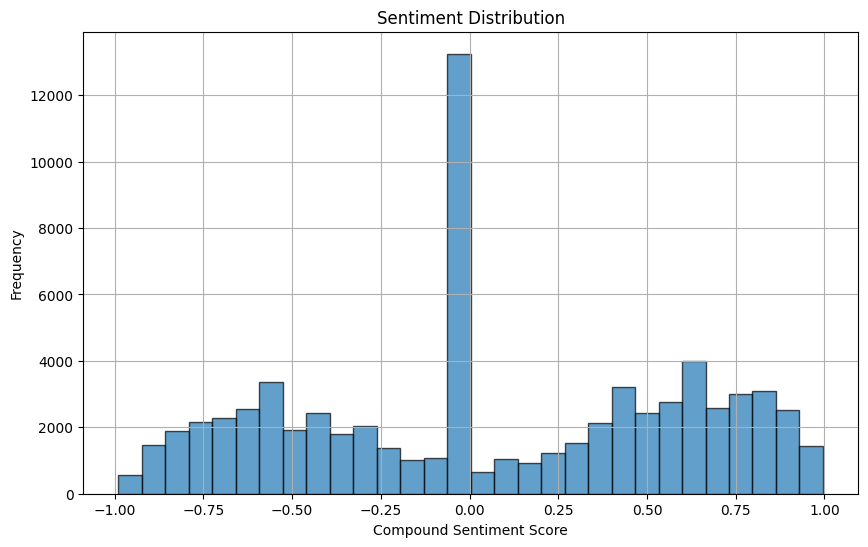

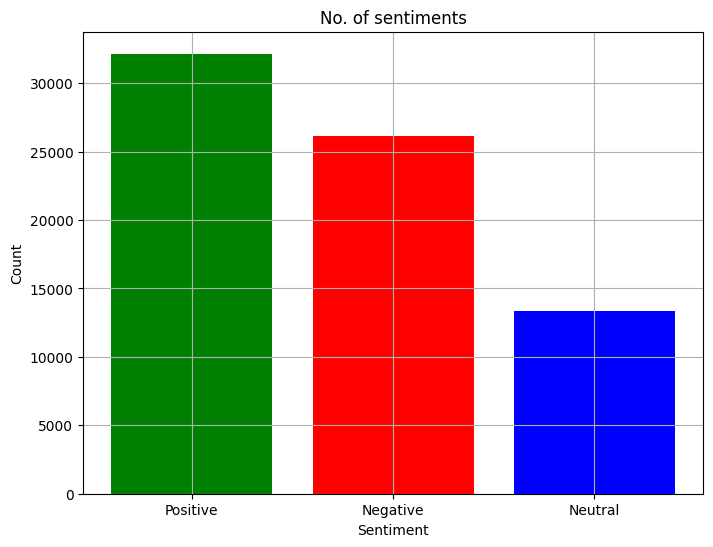

In [45]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('No. of sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()


                                           tweet_content  sentiment_score   
0      im getting on borderlands and i will murder yo...             0.00  \
1      I am coming to the borders and I will kill you...             0.00   
2      im getting on borderlands and i will kill you ...             0.00   
3      im coming on borderlands and i will murder you...             0.00   
4      im getting on borderlands 2 and i will murder ...             0.00   
...                                                  ...              ...   
74677  Just realized that the Windows partition of my...            -0.40   
74678  Just realized that my Mac window partition is ...            -0.40   
74679  Just realized the windows partition of my Mac ...            -0.40   
74680  Just realized between the windows partition of...            -0.05   
74681  Just like the windows partition of my Mac is l...            -0.40   

      sentiment  
0       Neutral  
1       Neutral  
2       Neutral  
3  

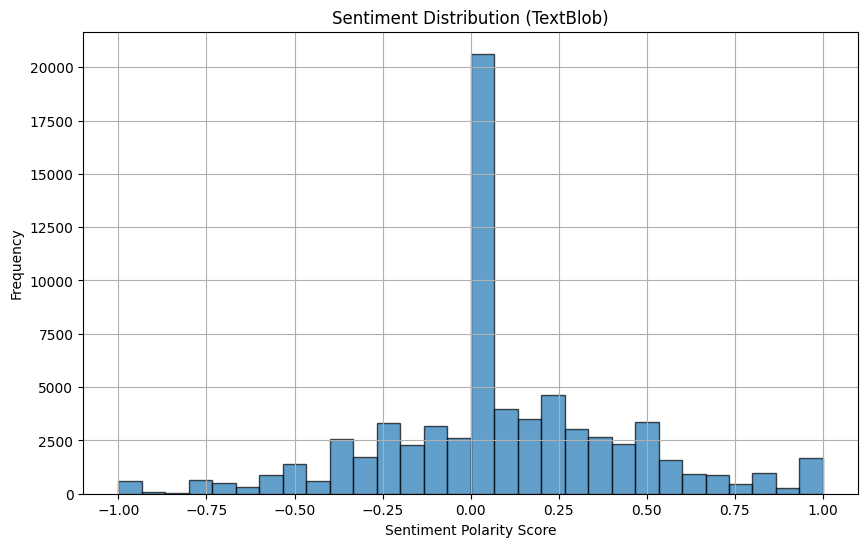

In [46]:
import matplotlib.pyplot as plt
# Function to classify sentiment based on TextBlob sentiment polarity
# Function to classify sentiment based on TextBlob sentiment polarity
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and store results in a new column 'sentiment_score'
df['sentiment_score'] = df['tweet_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment interpretation
print(df[['tweet_content', 'sentiment_score', 'sentiment']])

# Plot sentiment distribution using a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

